# Predicting Water Levels for the Auser Aquifer

## Problem Statement

The Acea Group is one of the leading Italian multiutility operators that manages and develops water and electricity networks and environmental services. Its water services supply a total of 9 million inhabitants in Lazio, Tuscany, Umbria, Molise and Campania regions of Italy. Water supply companies struggle with the forecasting of water levels in the various waterbodies they manage (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. This study aims to predict the water levels at various points of the Auser Aquifer waterbody.

## Executive Summary

A dataset containing rainfall, temperature, volume drawn, hydrometry and depths at various locations linked to the Auser Aquifer was provided. This waterbody consists of two subsystems, split into north and south, where the former partly influences the behavior of the latter. The north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater. The levels of the north subsystem are represented by the depths of the SAL, PAG, CoS and DIEC wells, while the levels of the south subsystem are represented by the depth of the LT2 well.

The features to be predicted for this project are the <span style="color:blue">depths of the SAL, CoS and LT2 wells.</span> Features like rainfall and temperature affect features like depth to groundwater and hydrometry some time after. However, it is unknown how many days, weeks or months later that these effects are observed.

This project aims to build models that can forecast the depths of the targeted variables 7 days ahead. EDA, data cleaning and feature engineering will be performed on the dataset given. Following which, time series and regression models will be tried to see which of these give the lowest RMSE.

## Importing libraries and dataset

In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aus = pd.read_csv('Aquifer_Auser.csv')

## Quick Peek & Short Summary of the dataset

In [3]:
aus.head()

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
aus.tail()

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02
8153,30/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.90,0.0,25.05,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.05


In [5]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [6]:
aus.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_Gallicano,5295.0,4.948782,14.366480,0.000000,0.000000,0.000000,2.000000,318.800000
Rainfall_Pontetetto,5295.0,3.495449,9.983772,0.000000,0.000000,0.000000,1.000000,146.600000
Rainfall_Monte_Serra,5289.0,3.919077,10.815270,0.000000,0.000000,0.000000,1.600000,152.200000
Rainfall_Orentano,5295.0,3.150670,8.747507,0.000000,0.000000,0.000000,1.000000,108.800000
Rainfall_Borgo_a_Mozzano,5295.0,4.578961,12.771166,0.000000,0.000000,0.000000,2.000000,176.600000
Rainfall_Piaggione,4930.0,3.953976,10.888103,0.000000,0.000000,0.000000,1.400000,140.800000
Rainfall_Calavorno,5295.0,4.578886,12.461918,0.000000,0.000000,0.000000,2.000000,209.000000
Rainfall_Croce_Arcana,5295.0,2.849745,9.239679,0.000000,0.000000,0.000000,1.400000,285.000000
Rainfall_Tereglio_Coreglia_Antelminelli,5295.0,4.182927,11.135511,0.000000,0.000000,0.000000,2.000000,147.200000
Rainfall_Fabbriche_di_Vallico,5295.0,5.922304,16.281733,0.000000,0.000000,0.000000,3.000000,197.000000


## Initial EDA

In [7]:
aus['Date'] = pd.to_datetime(aus['Date'], format='%d/%m/%Y')
# converting date column to datetime format

In [8]:
aus.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [9]:
abs_cols = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
           'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']
# absolute values can be taken from the above columns as clarified by competition host in a discussion thread on kaggle

In [10]:
for col in abs_cols:
    aus[col] = abs(aus[col])

Plotting all the features across time

In [11]:
def scatterplot(df, col, title):
    plt.figure(figsize=(15,5))
    plt.grid(b=True)
    plt.title(title)
    plt.scatter(df['Date'], df[col], s=5);

<ipython-input-11-f08042e4699e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


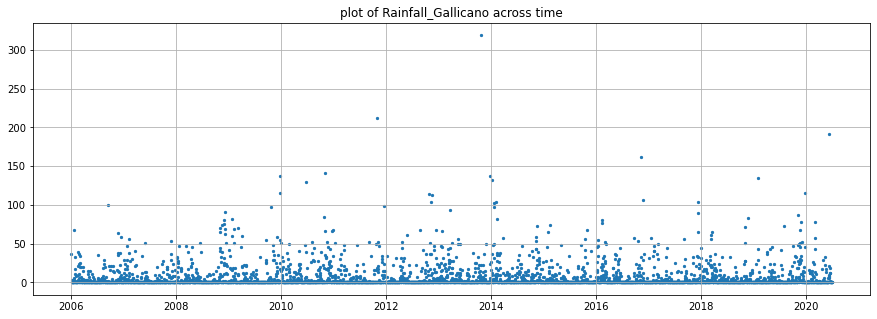

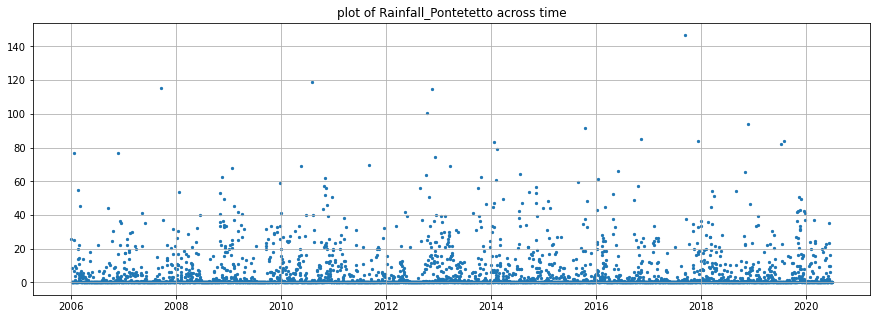

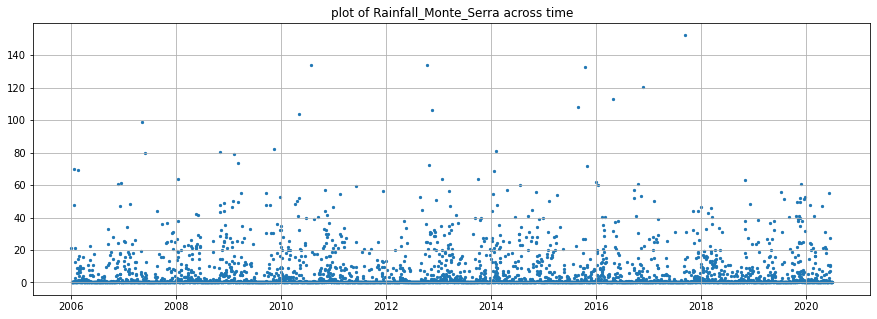

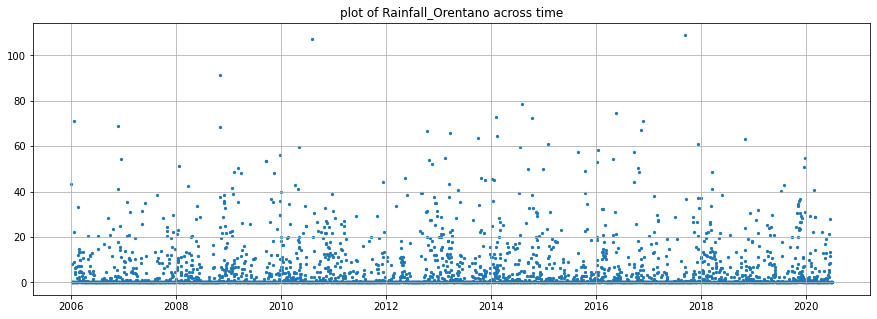

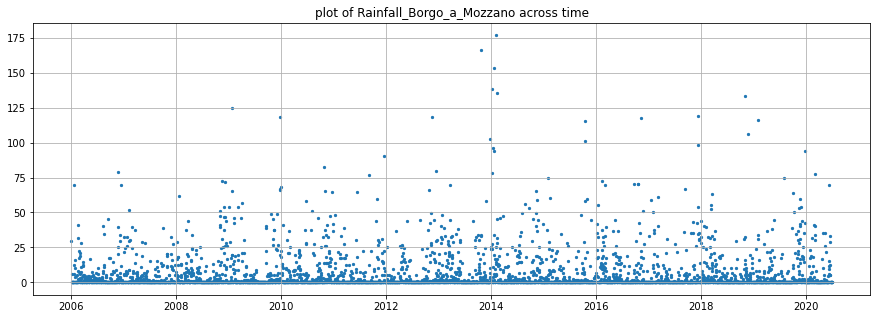

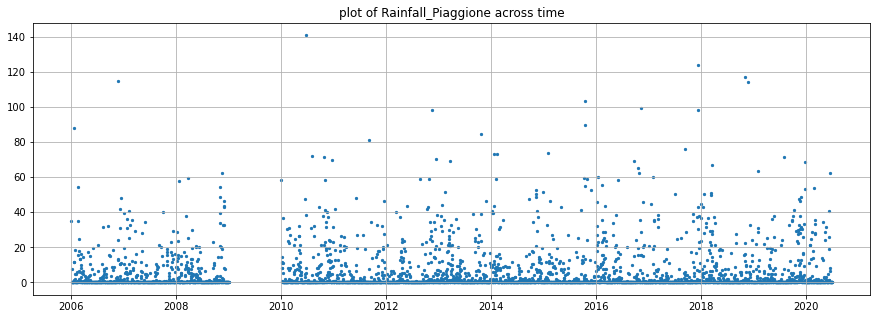

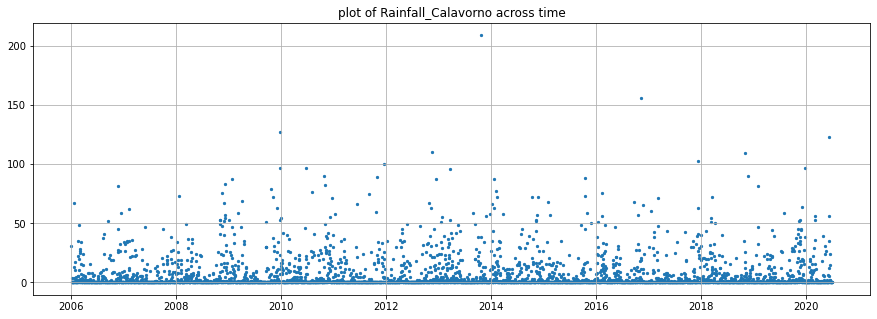

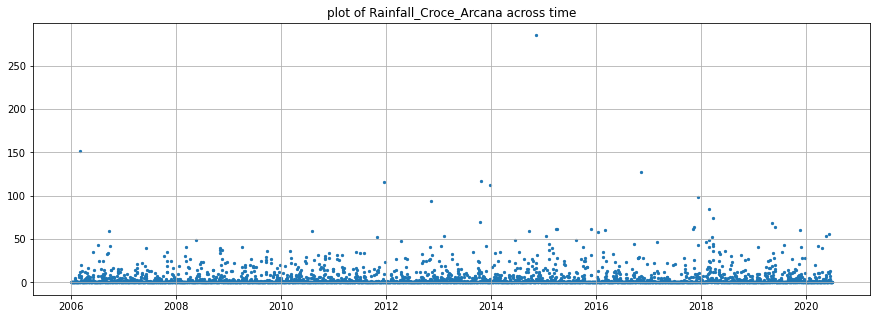

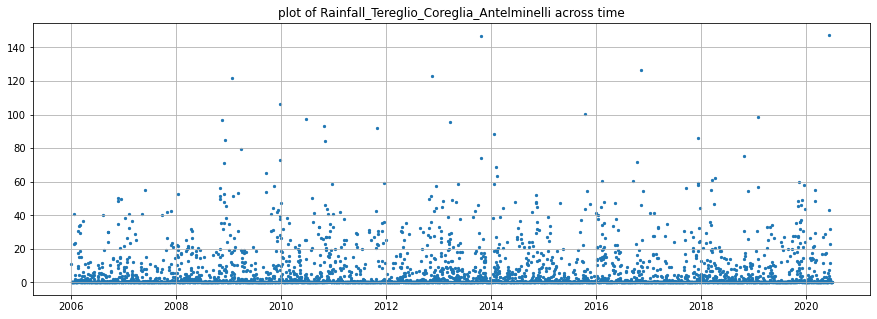

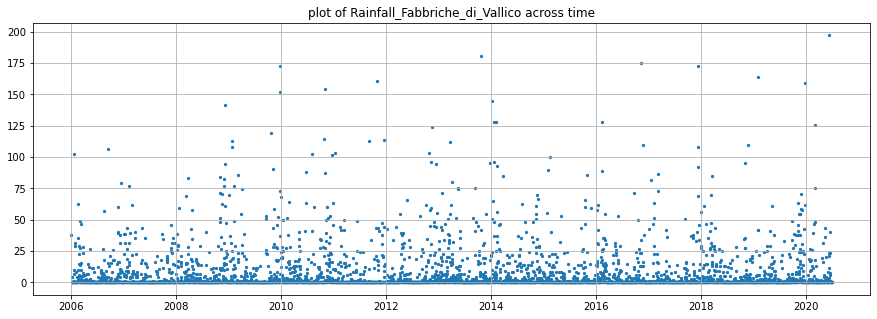

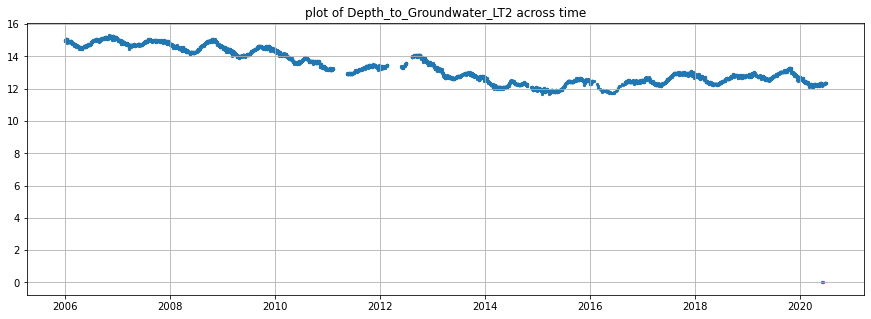

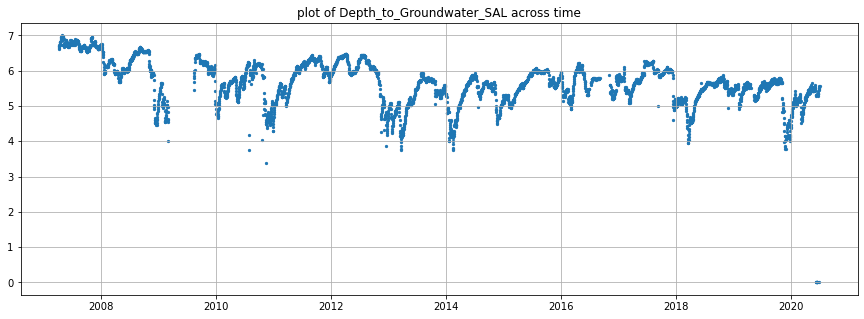

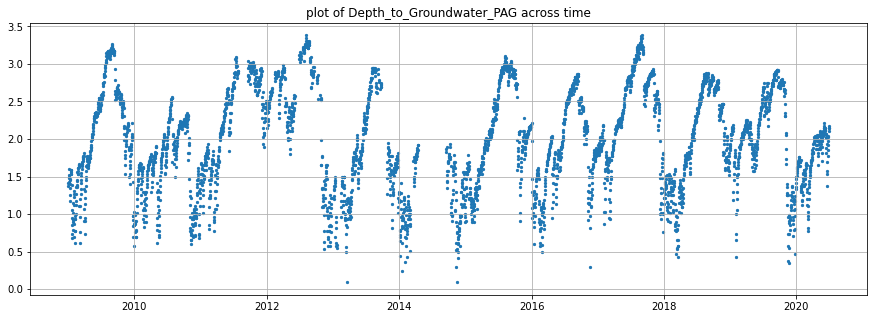

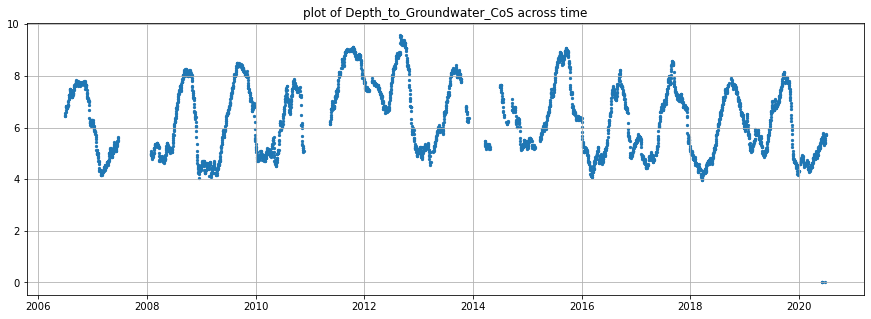

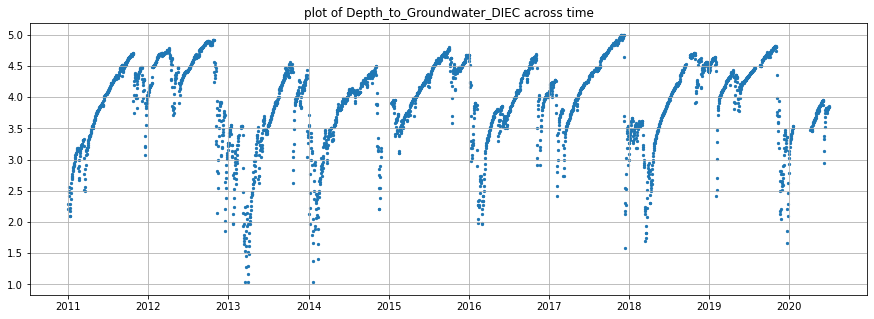

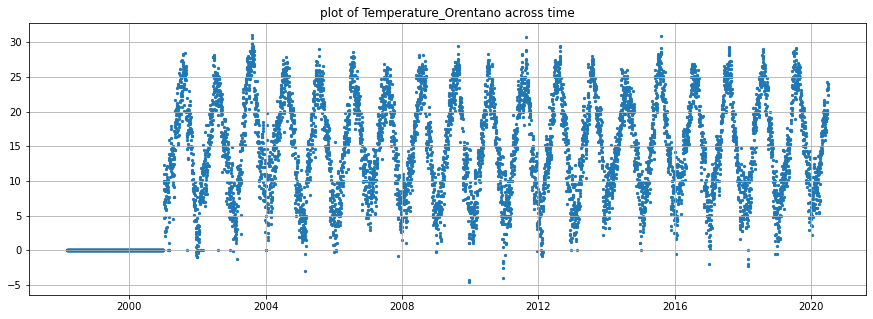

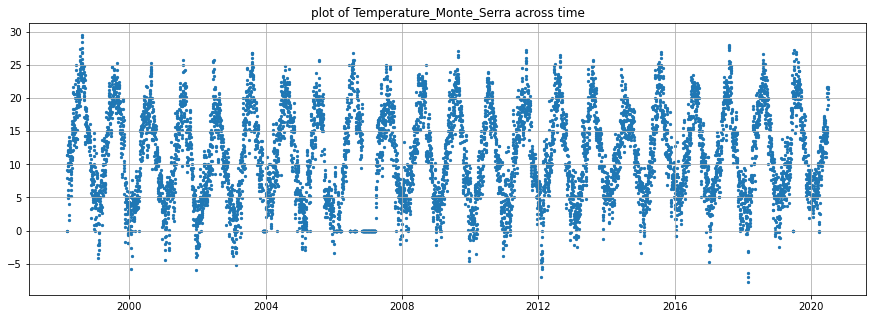

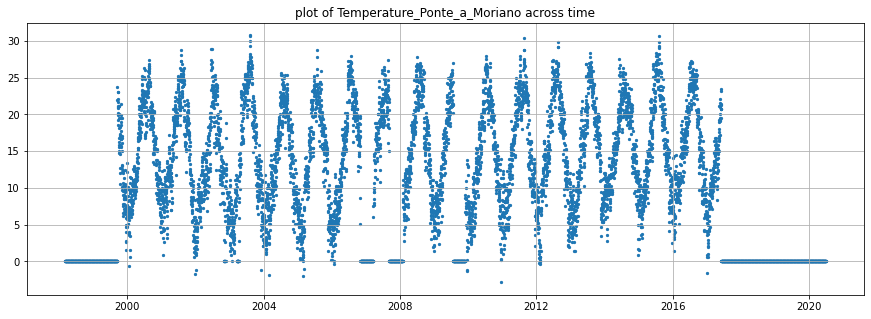

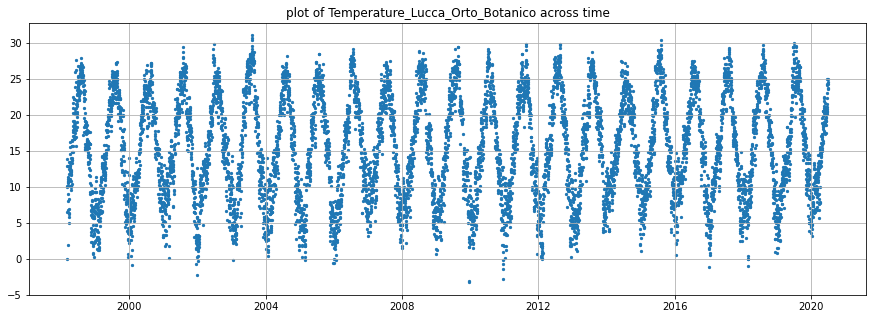

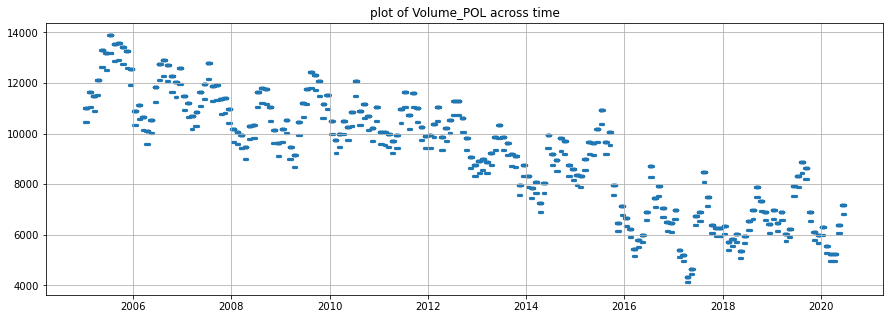

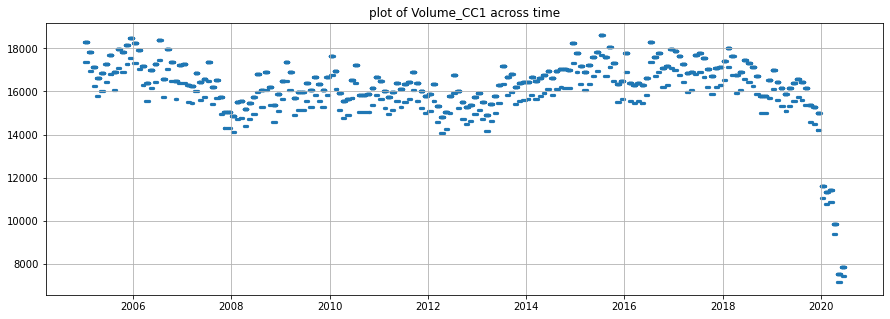

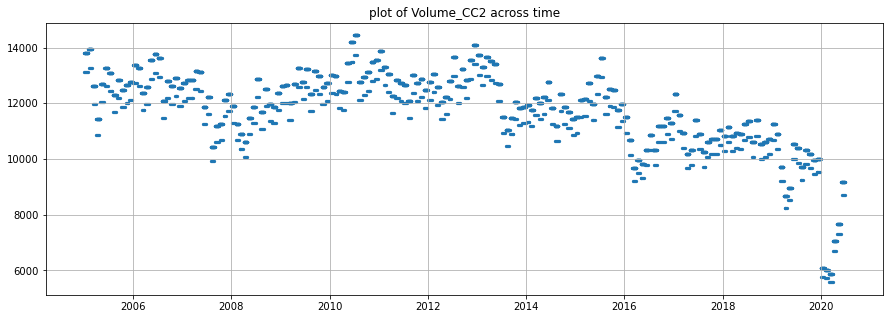

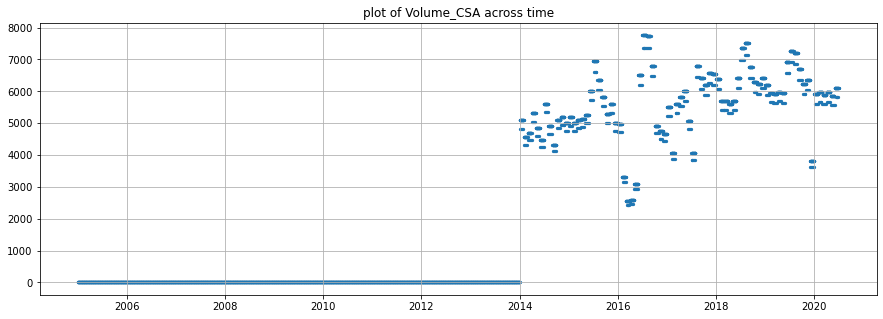

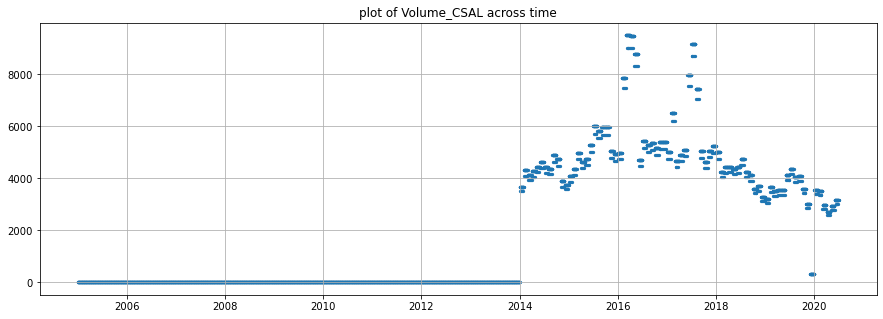

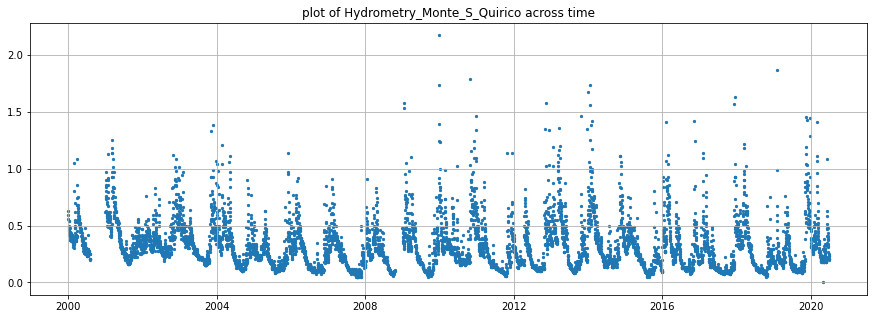

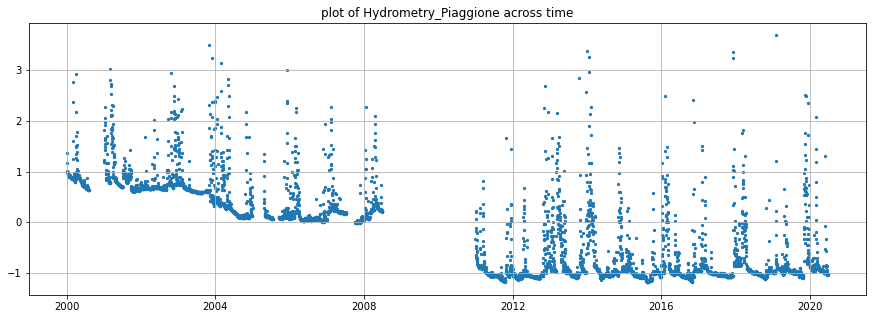

In [12]:
for col in aus.drop('Date', axis = 1).columns:
    scatterplot(aus, col, ('plot of ' + str(col) + ' across time'))

Observations from the above plots:

- Values for the features of Volume CSA & CSAL from before 2014 were all zeros.


- Temperature Ponte a Moriano contains 0 values from 2017 onwards indicating that the field instrument failed and wasn't replaced/repaired.


- Some 0 values and null values are observed. These are taken to be instrument failures.


- Rainfall data seems random at first glance while temperature data shows a seasonal pattern.


- Volumes drawn at points CC1 and CC2 show a sudden drop in 2020.